In [1]:
# imports
import pandas as pd
import numpy as np

In [2]:
# NOTE WHAT COLUMN TO INCLUDE AND WHAT NOT TO INCLUDE

- C Column can be 0 and less than 0, no dash
- S can be 0 CANNOT be less than 0, no dash
- T3-T5 --> can be 0, and less than 0, no dash
- T1 --> CANNOT be 0, less than 0, no dashes 
- T2 --> CANNOT be 0, less than 0, no dashes
- P --> CANNOT be 0, less than 0, no dashes

In [3]:
# read in the whole file and '-' as NA values 
data = pd.read_excel('Competition1_raw_data.xlsx', na_values=r'-')
                    #dtype={'P(IPO)': float, 'P(1Day)': float})
# define dashes as missing --> 0 or NaN
data.head(5)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


We see there are missing values in all columns but I1 and I3. Moreover, some do not have the correct data type.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


The P columns look quite consistent. 

In [5]:
data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [6]:
# replace with nan
data.loc[(data['S1'] < 0),'S1'] = np.nan
data.loc[(data['T2'] == 0),'T2'] = np.nan
data.loc[(data['T5'] < 0),'T5'] = np.nan

# drop - for P values 
data.dropna(subset=['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)'], inplace=True)

# impute 
data['S1'] = data['S1'].fillna(data['S1'].median())
data['T2'] = data['T2'].fillna(data['T2'].median())
data['T5'] = data['T5'].fillna(data['T5'].median())
data['C3_impute'] = data['C3'].fillna(data['C3'].median())
data['C7_impute'] = data['C7'].fillna(data['C7'].median())

# exclude not imputed C3 and C7
data = data[['I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2',
       'C4', 'C5', 'C6', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3',
       'C3_impute', 'C7_impute']]

In [7]:
data[data['T5']==0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,...,T1,T2,T3,T4,T5,S1,S2,S3,C3_impute,C7_impute


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 22 columns):
I1           660 non-null object
I2           660 non-null object
I3           660 non-null object
P(IPO)       660 non-null float64
P(H)         660 non-null float64
P(L)         660 non-null float64
P(1Day)      660 non-null float64
C1           660 non-null float64
C2           660 non-null float64
C4           660 non-null float64
C5           660 non-null float64
C6           660 non-null float64
T1           660 non-null float64
T2           660 non-null float64
T3           660 non-null float64
T4           660 non-null float64
T5           660 non-null float64
S1           660 non-null float64
S2           660 non-null float64
S3           660 non-null float64
C3_impute    660 non-null float64
C7_impute    660 non-null float64
dtypes: float64(19), object(3)
memory usage: 118.6+ KB


In [9]:
data.isnull().sum()

I1           0
I2           0
I3           0
P(IPO)       0
P(H)         0
P(L)         0
P(1Day)      0
C1           0
C2           0
C4           0
C5           0
C6           0
T1           0
T2           0
T3           0
T4           0
T5           0
S1           0
S2           0
S3           0
C3_impute    0
C7_impute    0
dtype: int64

In [10]:
data[data['P(1Day)']<0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,...,T1,T2,T3,T4,T5,S1,S2,S3,C3_impute,C7_impute


## ERROR WITH C3`

In [11]:
# C2 to int (booleon)
data['C2'] = data['C2'].astype(int)

# P(mid) calculation and add it to the column 
# P(mid) = (P(H)+P(L))/2
data['P(mid)'] = (data['P(H)'] + data['P(L)'])/2

# targets to be calculated
# make it equal to P(IPO) then we will just replace
#data['Y1'] = data['P(IPO)']
#data['Y2'] = data['P(IPO)']

# replace Y1 and change dtype to binary
data['Y1'] = np.where((data['P(IPO)'] < data['P(mid)']), 1, 0)
data['Y2'] = np.where((data['P(IPO)'] > data['P(mid)']), 1, 0)
#data.loc[(data['Y1'] < data['P(mid)']),'Y1'] = 1
#data.loc[(data['Y1'] > data['P(mid)']),'Y1'] = 0
#data['Y1'] = data['Y1'].astype(int)

# replace Y2
#data.loc[(data['Y2'] < data['P(1Day)']),'Y2'] = 1
#data.loc[(data['Y2'] > data['P(1Day)']),'Y2'] = 0
#data['Y2'] = data['Y2'].astype(int)

# Control values to be calculated
#data['C3`'] = data['C3_impute']
#df['Event'] = np.where((df.Event == 'Painting'),'Art',df.Event)
#data['C3`'] = np.where((data['C3_impute'] > 0),1,data['C3_impute'])
#data['C3`'] = np.where((data['C3_impute'] < 0),0,data['C3_impute'])
#data['C3`'] = np.where((data['C3_impute'] == 0),1,data['C3_impute'])
#data['C3`'] = data['C3_impute']
def c3_prime(c3_impute):
    if c3_impute > 0:
        return (1)
    else:
        return (0)
    
data['C3`'] = data['C3_impute'].apply(c3_prime)
data['C3`'] = data['C3`'].astype(int)

# C5`
data['C5`'] = data['C5']/data['C6']
data['C5`'] = data['C5`'].astype(float)

# C6`
data['C6calc'] = ((data['P(IPO)'] - data['P(mid)']) / data['P(mid)']) * 1
data['C6`'] = 0
data['C6`'] = np.where((data['P(IPO)'] > data['P(mid)']),data['C6calc'],data['C6`'])
data['C6`'] = np.where((data['P(IPO)'] < data['P(mid)']),0,data['C6`'])
data['C6`'] = np.where((data['P(mid)']==0),0,data['C6`'])
data['C6`'] = data['C6`'].astype(float)

In [12]:
data['C3`'].value_counts()

0    345
1    315
Name: C3`, dtype: int64

In [13]:
# replace T3, and T4
data.loc[(data['T3'] == 0),'T3'] = np.nan
data.loc[(data['T4'] == 0),'T4'] = np.nan

# fillna
data['T3'] = data['T3'].fillna(data['T3'].median())
data['T4'] = data['T4'].fillna(data['T4'].median())

In [14]:
#data.loc[data['T4'] == '-'] 
#data.drop(217,inplace=True)
#percent of long sentences
data["T1prime"] = data["T4"].astype(float)/data["T1"].astype(float)
# T2
data['T2prime'] = data['T5'].astype(float)/data['T2'].astype(float)
#percent of real words
data["T3prime"] = data["T3"].astype(float)/data["T2"].astype(float)
#percent of long sentences
data["T4prime"] = data["T1"].astype(float)/data["T4"].astype(float)
# percent of long words 
data["T5prime"] = data["T5"].astype(float)/data["T2"].astype(float)
#percent of positive words
data["S1prime"] = data["S1"].astype(float)/data["T2"].astype(float)
#percent of negative words
data["S2prime"] = data["S2"].astype(float)/data["T2"].astype(float)
#percent of uncertain words
data["S3prime"] = data["S3"].astype(float)/data["T2"].astype(float)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 37 columns):
I1           660 non-null object
I2           660 non-null object
I3           660 non-null object
P(IPO)       660 non-null float64
P(H)         660 non-null float64
P(L)         660 non-null float64
P(1Day)      660 non-null float64
C1           660 non-null float64
C2           660 non-null int64
C4           660 non-null float64
C5           660 non-null float64
C6           660 non-null float64
T1           660 non-null float64
T2           660 non-null float64
T3           660 non-null float64
T4           660 non-null float64
T5           660 non-null float64
S1           660 non-null float64
S2           660 non-null float64
S3           660 non-null float64
C3_impute    660 non-null float64
C7_impute    660 non-null float64
P(mid)       660 non-null float64
Y1           660 non-null int64
Y2           660 non-null int64
C3`          660 non-null int64
C5`          660 non-n

In [16]:
# exclude C6Calc, C6' and put Y1, Y2 at the end
# only include continous 
data_copy = data.copy()
data1 = data_copy[['C1', 'C4',
       'C5', 'C6', 'C3_impute',
       'C7_impute', 'C5`',
       'T1prime', 'T2prime','T3prime', 'T4prime', 'T5prime', 'S1prime',
       'S2prime', 'S3prime','Y1', 'Y2']]

In [17]:
# make a csv file
data1.to_csv('omg2.csv')

# Descriptive

REPORT IT with interpretation 

In [18]:
data1.describe()

,C1,C4,C5,C6,C3_impute,C7_impute,C5`,T1prime,T2prime,T3prime,T4prime,T5prime,S1prime,S2prime,S3prime,Y1,Y2
count,660.000000,660.000000,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,149.728788,0.007282,4.996285e+07,1.258248e+07,0.066724,470.631368,4.417255,0.628496,0.052271,0.895157,1.611520,0.052271,0.005318,0.009059,0.011519,0.500000,0.383333
std,152.817467,0.033318,1.055377e+08,2.539940e+07,158.390378,1587.801852,5.133537,0.069606,0.007144,0.044090,0.187237,0.007144,0.001744,0.003000,0.002851,0.500379,0.486567
min,10.000000,-0.162352,3.693227e+06,8.000000e+05,-786.239000,0.074000,0.283223,0.395480,0.031595,0.669838,1.210145,0.031595,0.001602,0.002152,0.005326,0.000000,0.000000
25%,85.000000,-0.013927,1.877568e+07,5.124546e+06,-0.795000,41.458000,2.850622,0.580706,0.047562,0.883417,1.482666,0.047562,0.004134,0.006966,0.009579,0.000000,0.000000
50%,107.000000,0.009125,2.745438e+07,7.500000e+06,0.000000,107.462000,3.731035,0.628861,0.051943,0.897294,1.590177,0.051943,0.005041,0.008577,0.011301,0.500000,0.000000
75%,155.250000,0.031571,5.003986e+07,1.200000e+07,0.402500,300.764000,4.857904,0.674461,0.056489,0.909693,1.722041,0.056489,0.006256,0.010521,0.012848,1.000000,1.000000
max,2087.000000,0.092896,2.138085e+09,4.212336e+08,3864.500000,30683.000000,99.787255,0.826347,0.093585,1.579238,2.528571,0.093585,0.012839,0.024605,0.029397,1.000000,1.000000


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 17 columns):
C1           660 non-null float64
C4           660 non-null float64
C5           660 non-null float64
C6           660 non-null float64
C3_impute    660 non-null float64
C7_impute    660 non-null float64
C5`          660 non-null float64
T1prime      660 non-null float64
T2prime      660 non-null float64
T3prime      660 non-null float64
T4prime      660 non-null float64
T5prime      660 non-null float64
S1prime      660 non-null float64
S2prime      660 non-null float64
S3prime      660 non-null float64
Y1           660 non-null int64
Y2           660 non-null int64
dtypes: float64(15), int64(2)
memory usage: 92.8 KB


# Normality test

In [20]:
# categorical no standardization, normalization
# if skew is between -0.5 and 0.5 it will be consider normalized 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3c039b0f0>,
      dtype=object)

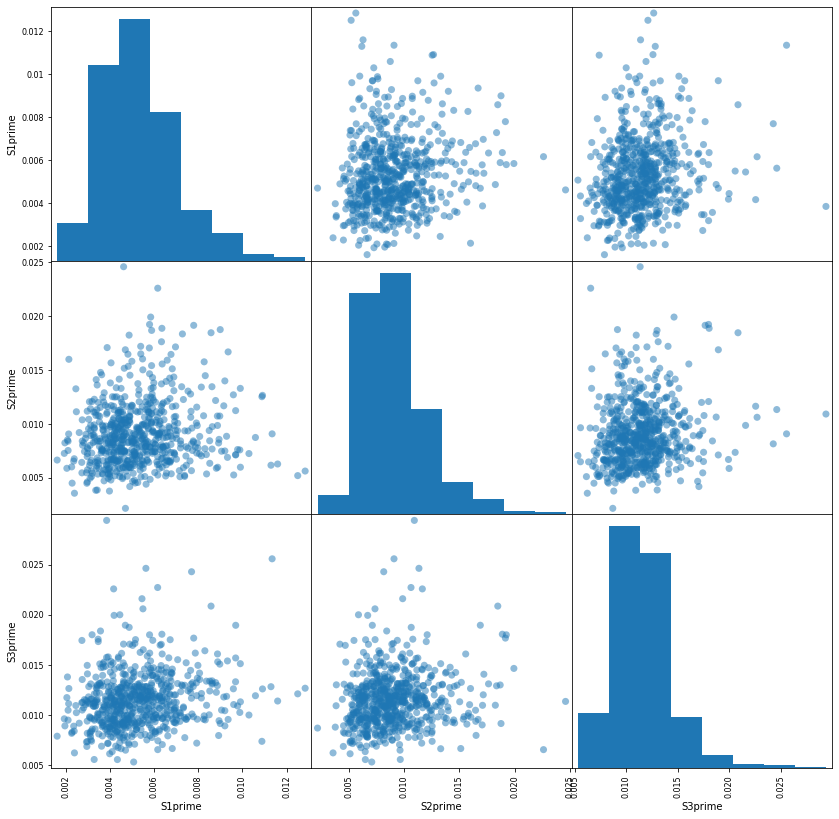

In [21]:
pd.plotting.scatter_matrix(data1[['S1prime', 'S2prime', 'S3prime']], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)

In [22]:
print('S1prime: ',data1['S1prime'].skew())
print('S2prime: ',data1['S2prime'].skew())
print('S3prime: ',data1['S3prime'].skew())

S1prime:  0.9358231221598661
S2prime:  1.2066602274774798
S3prime:  1.395926086688986


In [23]:
# alternative use Shapiro but its too strict
# only for the continous 
# another skewness test --> request skewness from pandas 
# and look at the histograms 
from scipy.stats import shapiro
stat, p = shapiro(data['S1prime'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.954, p=0.000
Sample does not look Gaussian (reject H0)


In [24]:
data1['S1prime_norm']=np.log((data1['S1prime']))
data1['S2prime_norm']=np.log((data1['S2prime']))
data1['S3prime_norm'] = np.log(data1['S3prime'])

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

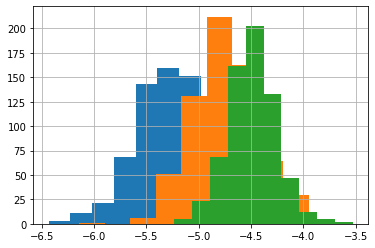

In [25]:
data1['S1prime_norm'].hist()
data1['S2prime_norm'].hist()
data1['S3prime_norm'].hist()

In [26]:
print('S1prime normalized: ' , data1['S1prime_norm'].skew())
print('S2prime normalized: ' , data1['S2prime_norm'].skew())
print('S3prime normalized: ' , data1['S3prime_norm'].skew())

S1prime normalized:  -0.12556376950788897
S2prime normalized:  0.08438832634954983
S3prime normalized:  0.2235856617352291


In [27]:
# outliers --> IQR and 3st dev method 
# we standardize all but Y's right? 
# binning? 
# select only continous variables to put into evaluation code

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3b5fa76d8>,
      dtype=object)

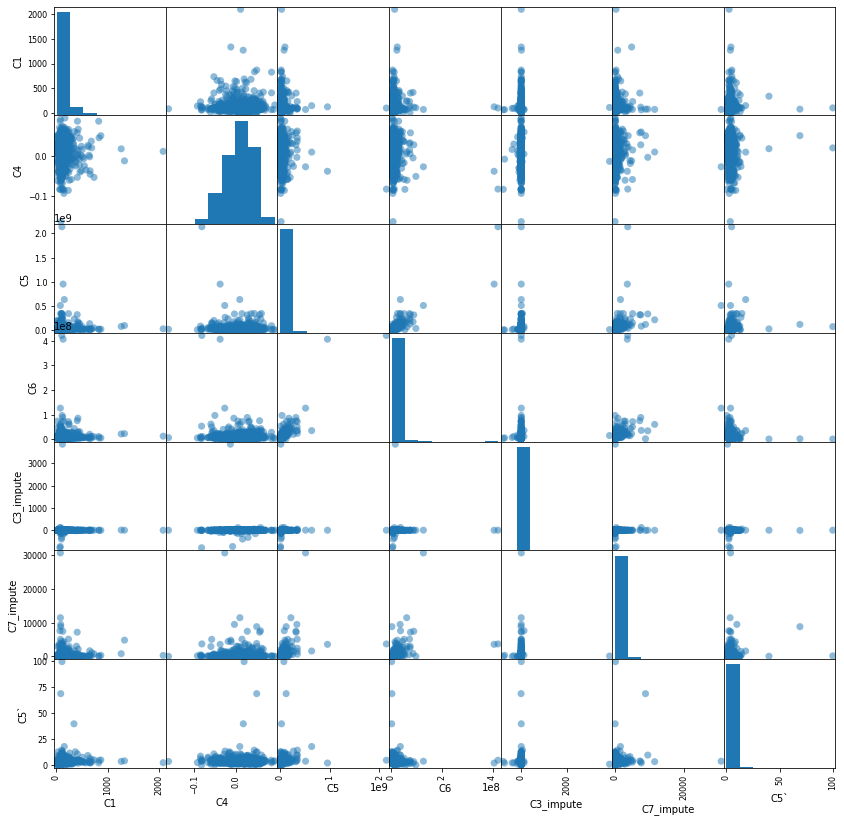

In [28]:
pd.plotting.scatter_matrix(data1[['C1', 'C4',
       'C5', 'C6', 'C3_impute',
       'C7_impute', 'C5`']], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)

In [29]:
# test
print('C1: ',data1['C1'].skew())
print('C3_impute: ',data1['C3_impute'].skew())
print('C4: ',data1['C4'].skew())
print('C5: ',data1['C5'].skew())
print('C6: ',data1['C6'].skew())
print('C7_impute: ',data1['C7_impute'].skew())
print('C5prime: ',data1['C5`'].skew())
#print('C6prime: ',data1['C6`'].skew())

C1:  5.649484948760403
C3_impute:  21.727253451311732
C4:  -0.4778924619388421
C5:  13.461311505350828
C6:  12.439170657119098
C7_impute:  12.163784427357575
C5prime:  13.405535814317505


In [30]:
data1['C1_norm'] = np.log(data1['C1'])
data1['C3_norm'] = np.tanh(data1['C3_impute']+1)
data1['C5_norm'] = 1/(np.log(data1['C5']))
data1['C6_norm'] = 1/(np.log(data1['C6']))
data1['C7_norm'] = np.log(data1['C7_impute']+1)
data1['C5prime_norm'] = np.log(data1['C5`'])
#data1['C6prime_norm'] = np.sqrt(np.log(data1['C6`']+1))

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

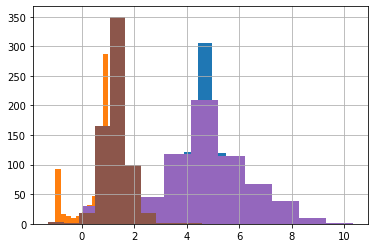

In [31]:
data1['C1_norm'].hist()
data1['C3_norm'].hist()
data1['C5_norm'].hist()
data1['C6_norm'].hist()
data1['C7_norm'].hist()
data1['C5prime_norm'].hist()
#data1['C6prime_norm'].hist()

In [32]:
print('C1_normalized: ', data1['C1_norm'].skew())
print('C3_normalized: ', data1['C3_norm'].skew())
print('C5_normalized: ', data1['C5_norm'].skew())
print('C6_normalized: ', data1['C6_norm'].skew())
print('C7_normalized: ', data1['C7_norm'].skew())
print('C5prime_normalized: ', data1['C5prime_norm'].skew())
#print('C6prime_normalized: ', data1['C6prime_norm'].skew())

C1_normalized:  0.13206924296483574
C3_normalized:  -1.221996884528623
C5_normalized:  -0.3913588014366576
C6_normalized:  -0.3936679536459565
C7_normalized:  -0.19508055631888138
C5prime_normalized:  0.4273718005667461


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3b501f208>,
      dtype=object)

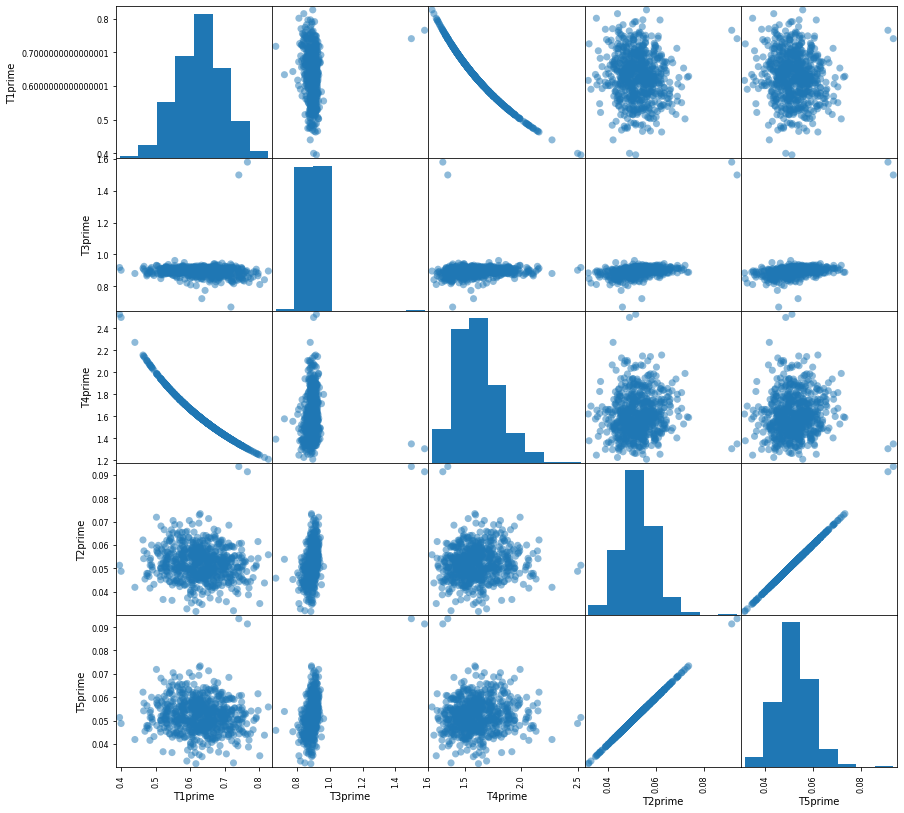

In [33]:
pd.plotting.scatter_matrix(data1[['T1prime','T3prime', 'T4prime', 'T2prime','T5prime']], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)

In [34]:
# T1 looks good 

In [35]:
print('T1prime: ', data1['T1prime'].skew())
print('T2prime: ', data1['T2prime'].skew())
print('T3prime: ', data1['T3prime'].skew())
print('T4prime: ', data1['T4prime'].skew())
print('T5prime: ', data1['T5prime'].skew())

T1prime:  -0.07334306343078599
T2prime:  0.5833786957119567
T3prime:  9.101177497494934
T4prime:  0.8229552871858807
T5prime:  0.5833786957119567


In [36]:
data1['T2prime_norm'] = np.sqrt(data1['T2prime'])
data1['T3prime_norm'] = 1/(np.log(data1['T3prime']))
data1['T4prime_norm'] = np.log(data1['T4prime'])
data1['T5prime_norm'] = np.sqrt(data1['T5prime'])

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [37]:
print('T2prime_norm: ', data1['T2prime_norm'].skew())
print('T3prime_norm: ', data1['T3prime_norm'].skew())
print('T4prime_norm: ', data1['T4prime_norm'].skew())
print('T5prime_norm: ', data1['T5prime_norm'].skew())

T2prime_norm:  0.2039439029069943
T3prime_norm:  -0.5010146548567442
T4prime_norm:  0.42138586072652406
T5prime_norm:  0.2039439029069943


In [38]:
data1.columns

Index(['C1', 'C4', 'C5', 'C6', 'C3_impute', 'C7_impute', 'C5`', 'T1prime',
       'T2prime', 'T3prime', 'T4prime', 'T5prime', 'S1prime', 'S2prime',
       'S3prime', 'Y1', 'Y2', 'S1prime_norm', 'S2prime_norm', 'S3prime_norm',
       'C1_norm', 'C3_norm', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm',
       'T2prime_norm', 'T3prime_norm', 'T4prime_norm', 'T5prime_norm'],
      dtype='object')

In [39]:
data1 = data1[['S1prime_norm', 'S2prime_norm',
       'S3prime_norm', 'C1_norm', 'C3_norm','C4', 'C5_norm', 'C6_norm', 'C7_norm',
       'C5prime_norm', 'T1prime','T2prime_norm', 'T3prime_norm',
       'T4prime_norm', 'T5prime_norm','Y1','Y2']]
data1.head()

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2
0,-5.323718,-4.688678,-4.516378,4.804021,0.999716,0.029074,0.057051,0.061819,3.957856,1.351792,0.640426,0.232915,-10.466155,0.445622,0.232915,0,1
1,-5.726618,-4.500360,-4.521238,5.556828,-0.551128,-0.013352,0.058213,0.068069,3.293464,2.487306,0.644753,0.226705,-9.365141,0.438887,0.226705,1,0
2,-4.457393,-5.071759,-4.473922,4.499810,-0.235496,0.020715,0.060098,0.064830,2.125609,1.214656,0.636816,0.248523,-10.523529,0.451275,0.248523,1,0
3,-4.637032,-4.941521,-4.318578,5.342334,0.089758,0.020023,0.060557,0.065276,2.254025,1.193831,0.539634,0.248253,-11.549720,0.616864,0.248253,1,0
4,-5.399715,-4.600461,-4.486414,4.382027,0.789461,-0.034895,0.058001,0.062791,6.450941,1.315407,0.587413,0.220341,-8.456290,0.532028,0.220341,0,1


In [40]:
data1.to_csv('normalized.csv')

# Outliers

In [41]:
# try running before doing outliers and make assumption to why you would do this and maybe only for some columns 
# 3 standard deviation for normalization, IQR normalization not needed

In [42]:
# exclude target variables
data2 = data1[['S1prime_norm', 'S2prime_norm',
       'S3prime_norm', 'C1_norm', 'C3_norm','C4', 'C5_norm', 'C6_norm', 'C7_norm',
       'C5prime_norm', 'T1prime','T2prime_norm', 'T3prime_norm',
       'T4prime_norm', 'T5prime_norm']]

In [43]:
# investigating the nature of the outliers - upper bound
for cols in data1.columns:
    u_bound = data1[cols].mean() + 3* data1[cols].std()
    print('Upper Bound: ', u_bound)
    print(cols, data1[cols][data1[cols]>u_bound],'\n')
#my_col[my_col>u_bound]
# investigating the nature of the outliers - lower bound
for cols in data1.columns:
    l_bound = data1[cols].mean() - 3* data1[cols].std()
    print('Lower Bound: ', l_bound)
    print(cols, data1[cols][data1[cols]<l_bound],'\n')

Upper Bound:  -4.316107279769483
S1prime_norm Series([], Name: S1prime_norm, dtype: float64) 

Upper Bound:  -3.8067280407937485
S2prime_norm 275   -3.704811
425   -3.789398
Name: S2prime_norm, dtype: float64 

Upper Bound:  -3.789625089864377
S3prime_norm 50    -3.717956
188   -3.666246
271   -3.784827
382   -3.526857
416   -3.704075
Name: S3prime_norm, dtype: float64 

Upper Bound:  6.768811483082619
C1_norm 65     7.643483
391    7.193686
665    7.144407
Name: C1_norm, dtype: float64 

Upper Bound:  2.4651591547137874
C3_norm Series([], Name: C3_norm, dtype: float64) 

Upper Bound:  0.10723513361722141
C4 Series([], Name: C4, dtype: float64) 

Upper Bound:  0.06611599225840087
C5_norm 313    0.066129
Name: C5_norm, dtype: float64 

Upper Bound:  0.07156774142647779
C6_norm 58     0.073571
78     0.071886
204    0.073571
Name: C6_norm, dtype: float64 

Upper Bound:  9.938065584914217
C7_norm 275    10.331497
Name: C7_norm, dtype: float64 

Upper Bound:  2.846098026634757
C5prime_norm

In [44]:
# going for all the columns - upper bound
for col in data1.columns:
    u_bound = data1[col].mean() + 3* data1[col].std()
    data1[col][data1[col] > u_bound] = u_bound

In [45]:
# going for all the columns - lower bound
for col in data1.columns:
    l_bound = data1[col].mean() - 3* data1[col].std()
    data1[col][data1[col] < l_bound] = l_bound

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [46]:
# verifying there is no value greater than the upper boundary
for cols in data1.columns:
    print(cols, (data1[cols]>u_bound).value_counts(),'\n')
    #print(cols,data1[cols]>u_bound.value_counts())
#pd.Series(my_col>u_bound).value_counts()
# checkin lower bound 
for cols in data1.columns:
    print(cols, (data1[cols]<l_bound).value_counts(),'\n')

S1prime_norm False    660
Name: S1prime_norm, dtype: int64 

S2prime_norm False    660
Name: S2prime_norm, dtype: int64 

S3prime_norm False    660
Name: S3prime_norm, dtype: int64 

C1_norm True    660
Name: C1_norm, dtype: int64 

C3_norm False    660
Name: C3_norm, dtype: int64 

C4 False    660
Name: C4, dtype: int64 

C5_norm False    660
Name: C5_norm, dtype: int64 

C6_norm False    660
Name: C6_norm, dtype: int64 

C7_norm True     608
False     52
Name: C7_norm, dtype: int64 

C5prime_norm False    585
True      75
Name: C5prime_norm, dtype: int64 

T1prime False    660
Name: T1prime, dtype: int64 

T2prime_norm False    660
Name: T2prime_norm, dtype: int64 

T3prime_norm False    660
Name: T3prime_norm, dtype: int64 

T4prime_norm False    660
Name: T4prime_norm, dtype: int64 

T5prime_norm False    660
Name: T5prime_norm, dtype: int64 

Y1 False    660
Name: Y1, dtype: int64 

Y2 False    660
Name: Y2, dtype: int64 

S1prime_norm True    660
Name: S1prime_norm, dtype: int64 

In [47]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 15 columns):
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
dtypes: float64(15)
memory usage: 82.5 KB


In [48]:
data2.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
dtype: int64

In [49]:
# add Y1 and Y2
data3 = pd.concat([data2,data1[['Y1','Y2']]], axis = 1)

In [50]:
data3.head()

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2
0,-5.323718,-4.688678,-4.516378,4.804021,0.999716,0.029074,0.057051,0.061819,3.957856,1.351792,0.640426,0.232915,-10.466155,0.445622,0.232915,0,1
1,-5.726618,-4.500360,-4.521238,5.556828,-0.551128,-0.013352,0.058213,0.068069,3.293464,2.487306,0.644753,0.226705,-9.365141,0.438887,0.226705,1,0
2,-4.457393,-5.071759,-4.473922,4.499810,-0.235496,0.020715,0.060098,0.064830,2.125609,1.214656,0.636816,0.248523,-10.523529,0.451275,0.248523,1,0
3,-4.637032,-4.941521,-4.318578,5.342334,0.089758,0.020023,0.060557,0.065276,2.254025,1.193831,0.539634,0.248253,-11.549720,0.616864,0.248253,1,0
4,-5.399715,-4.600461,-4.486414,4.382027,0.789461,-0.034895,0.058001,0.062791,6.450941,1.315407,0.587413,0.220341,-8.456290,0.532028,0.220341,0,1


In [51]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 17 columns):
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
Y1              660 non-null int64
Y2              660 non-null int64
dtypes: float64(15), int64(2)
memory usage: 92.8 KB


In [52]:
data3.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
Y1              0
Y2              0
dtype: int64

In [53]:
data3.to_csv('Outlier_normalized.csv')

In [54]:
data3.columns

Index(['S1prime_norm', 'S2prime_norm', 'S3prime_norm', 'C1_norm', 'C3_norm',
       'C4', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm', 'T1prime',
       'T2prime_norm', 'T3prime_norm', 'T4prime_norm', 'T5prime_norm', 'Y1',
       'Y2'],
      dtype='object')

In [55]:
# IQR, minmax, normalize, z-score 

# Standardization - zscore

In [56]:
# exclude the Y1, Y2

In [57]:
# import z score
from scipy import stats

data4 = data3[['S1prime_norm', 'S2prime_norm', 'S3prime_norm', 'C1_norm', 'C3_norm',
       'C4', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm',
       'T1prime', 'T2prime_norm', 'T3prime_norm', 'T4prime_norm',
       'T5prime_norm']]

# make sure to exclude the Y1 and Y2
data4 = np.abs(stats.zscore(data4))
data4 = pd.DataFrame(data4)
data4.columns = ['S1prime_norm', 'S2prime_norm', 'S3prime_norm', 'C1_norm', 'C3_norm',
       'C4', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm',
       'T1prime', 'T2prime_norm', 'T3prime_norm', 'T4prime_norm',
       'T5prime_norm']
data4.head()

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm
0,0.108850,0.208366,0.105529,0.069129,0.852544,0.654566,0.368850,0.356508,0.408144,0.059313,0.171523,0.310334,0.519239,0.222130,0.310334
1,1.352857,0.804933,0.126310,1.192960,1.422466,0.619777,0.063268,1.796881,0.787037,2.295653,0.233747,0.090126,0.031054,0.281785,0.090126
2,2.566039,1.005186,0.076027,0.385014,0.959449,0.403480,0.764109,0.680999,1.453046,0.210771,0.119626,1.316698,0.544678,0.172067,1.316698
3,2.011379,0.592610,0.740320,0.872752,0.482319,0.382698,0.934891,0.834610,1.379812,0.251784,1.277595,1.299325,0.999687,1.294600,1.299325
4,0.343501,0.487827,0.022609,0.560847,0.544111,1.266863,0.015643,0.021321,1.013623,0.012345,0.590665,0.500441,0.371927,0.543185,0.500441


In [58]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
dtypes: float64(15)
memory usage: 77.5 KB


In [59]:
data4.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
dtype: int64

In [60]:
data3 = data3.reset_index()
data3 = data3.drop('index',axis=1)
data4 = data4.reset_index()
data4 = data4.drop('index',axis=1)

In [61]:
# add back the Y1 and Y2 (maybe also the categoricals)
data4 = pd.concat([data4, data3[['Y1','Y2']]],axis = 1)
data4.head()

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2
0,0.108850,0.208366,0.105529,0.069129,0.852544,0.654566,0.368850,0.356508,0.408144,0.059313,0.171523,0.310334,0.519239,0.222130,0.310334,0,1
1,1.352857,0.804933,0.126310,1.192960,1.422466,0.619777,0.063268,1.796881,0.787037,2.295653,0.233747,0.090126,0.031054,0.281785,0.090126,1,0
2,2.566039,1.005186,0.076027,0.385014,0.959449,0.403480,0.764109,0.680999,1.453046,0.210771,0.119626,1.316698,0.544678,0.172067,1.316698,1,0
3,2.011379,0.592610,0.740320,0.872752,0.482319,0.382698,0.934891,0.834610,1.379812,0.251784,1.277595,1.299325,0.999687,1.294600,1.299325,1,0
4,0.343501,0.487827,0.022609,0.560847,0.544111,1.266863,0.015643,0.021321,1.013623,0.012345,0.590665,0.500441,0.371927,0.543185,0.500441,0,1


In [62]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 17 columns):
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
Y1              660 non-null int64
Y2              660 non-null int64
dtypes: float64(15), int64(2)
memory usage: 87.8 KB


In [63]:
data4.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
Y1              0
Y2              0
dtype: int64

In [64]:
data4.to_csv('norm_outlier_zscore.csv')

In [65]:
# add back categoricals: C3` and C2 
# Bin I3 and add it back to the dataframe

Binning and including categorical values in a dataframe

In [66]:
data['C3`'].value_counts()

0    345
1    315
Name: C3`, dtype: int64

In [67]:
data['C3`'].count()

660

# Here

## ADD C3` later

In [68]:
data = data.reset_index()
data = data.drop('index',axis=1)

In [69]:
data4 = pd.concat([data4, data[['C2','I3','C3`']]], axis=1)
data4.head()

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2,C2,I3,C3`
0,0.108850,0.208366,0.105529,0.069129,0.852544,0.654566,0.368850,0.356508,0.408144,0.059313,0.171523,0.310334,0.519239,0.222130,0.310334,0,1,1,3674,1
1,1.352857,0.804933,0.126310,1.192960,1.422466,0.619777,0.063268,1.796881,0.787037,2.295653,0.233747,0.090126,0.031054,0.281785,0.090126,1,0,0,2834,0
2,2.566039,1.005186,0.076027,0.385014,0.959449,0.403480,0.764109,0.680999,1.453046,0.210771,0.119626,1.316698,0.544678,0.172067,1.316698,1,0,1,2834,0
3,2.011379,0.592610,0.740320,0.872752,0.482319,0.382698,0.934891,0.834610,1.379812,0.251784,1.277595,1.299325,0.999687,1.294600,1.299325,1,0,1,2834,0
4,0.343501,0.487827,0.022609,0.560847,0.544111,1.266863,0.015643,0.021321,1.013623,0.012345,0.590665,0.500441,0.371927,0.543185,0.500441,0,1,1,4492,1


In [70]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 20 columns):
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
Y1              660 non-null int64
Y2              660 non-null int64
C2              660 non-null int64
I3              660 non-null object
C3`             660 non-null int64
dtypes: float64(15), int64(4), object(1)
memory usage: 103.2+ KB


In [71]:
data4.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
Y1              0
Y2              0
C2              0
I3              0
C3`             0
dtype: int64

1
0100-0999	Agriculture, Forestry and Fishing
1000-1499	Mining
4000-4999	Transportation, Communications, Electric, Gas and Sanitary service
1500-1799	Construction
2000-3999	Manufacturing
2
5000-5199	Wholesale Trade
5200-5999	Retail Trade
6000-6799	Finance, Insurance and Real Estate
7000-8999	Services
9100-9729	Public Administration
3
9900-9999	Nonclassifiable

We notice an error in I3 for Dolby Laboratories. It seems they are participating in many industries. However, when searching online we found out that the its a company specializing in audio noise reduction and audio encoding/compression. Dolby licenses its technologies to consumer electronics manufacturers. Therefore we will change its I3 to 4000. 

DTS, Inc. is an American company that makes multichannel audio technologies for film and video. Based in Calabasas, California, the company introduced its DTS technology in 1993 as a higher-quality competitor to Dolby Laboratories. So we will change it to 4000. 

RealD Inc. is a private company known for its RealD 3D system, which is used for projecting films in stereoscopic 3D using circularly polarized light.

UPG's energy storage solutions

In [72]:
data4[data4['I3']=='6794, 3861, 3663, 7819']

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2,C2,I3,C3`
170,0.346595,0.241866,0.158981,0.385014,0.705646,0.384696,1.367499,1.541809,0.568277,0.113094,1.315596,1.040736,2.141008,1.259478,1.040736,0,1,1,"6794, 3861, 3663, 7819",1


In [73]:
data['I2'].loc[174:,]

174    D. MEDICAL INDUSTRIES LTD. 
175              Diamond Foods Inc
176    DUNKIN' BRANDS GROUP, INC. 
177               DOLE FOOD CO INC
178             DOMINOS PIZZA INC 
                  ...             
655                     ZIPCAR INC
656         Zeltiq Aesthetics Inc 
657     ZST Digital Networks, Inc.
658                    Zumiez Inc 
659                     SEALY CORP
Name: I2, Length: 486, dtype: object

In [74]:
data4[data4['I3']=='3651, 6794, 7819']

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2,C2,I3,C3`
183,0.492202,0.910626,1.200257,0.637421,0.799144,1.103217,1.107354,1.069875,0.532953,0.186588,0.384244,0.163224,0.314771,0.329303,0.163224,0,1,0,"3651, 6794, 7819",1


In [75]:
data['I2'].loc[187:,]

187     DreamWorks Animation, LLC
188                Demandware Inc
189       DESIGN WITHIN REACH INC
190                    DEXCOM INC
191        DUOYUAN PRINTING, INC.
                  ...            
655                    ZIPCAR INC
656        Zeltiq Aesthetics Inc 
657    ZST Digital Networks, Inc.
658                   Zumiez Inc 
659                    SEALY CORP
Name: I2, Length: 473, dtype: object

In [76]:
data4[data4['I3']=='3663, 3861, 6794']

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2,C2,I3,C3`
483,0.798241,0.046254,1.03625,0.257886,0.244147,0.14346,0.550055,0.571391,0.551994,0.031973,0.715982,0.622288,1.717514,0.675597,0.622288,0,1,1,"3663, 3861, 6794",0


In [77]:
data['I2'].loc[499:,]

499            Leidos Holdings, Inc. 
500              Spirit Airlines, Inc
501               SAFE BULKERS, INC. 
502    Sucampo Pharmaceuticals, Inc. 
503       Scopus Video Networks Ltd. 
                    ...              
655                        ZIPCAR INC
656            Zeltiq Aesthetics Inc 
657        ZST Digital Networks, Inc.
658                       Zumiez Inc 
659                        SEALY CORP
Name: I2, Length: 161, dtype: object

In [78]:
data4[data4['I3']=='7389, 5063']

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2,C2,I3,C3`
599,0.568421,0.080687,0.677795,0.212872,0.678322,0.223859,2.524046,1.446007,0.150255,1.596929,2.083901,1.561368,0.222082,2.266519,1.561368,1,0,0,"7389, 5063",1


In [79]:
data['I2'].loc[620:,]

620                         Dialogic Inc. 
621                           Verigy Ltd. 
622                Verisk Analytics, Inc. 
623                          VIRTUSA CORP 
624                    VERASUN ENERGY CORP
625                  Vitamin Shoppe, Inc. 
626                         Verastem, Inc.
627            ASSEMBLY BIOSCIENCES, INC. 
628                       WAGEWORKS, INC. 
629           Wesco Aircraft Holdings, Inc
630                     WebMD Health Corp.
631                         WCA WASTE CORP
632           WELLCARE HEALTH PLANS, INC. 
633                   Warner Chilcott plc 
634                         Workday, Inc. 
635                    BOINGO WIRELESS INC
636                   Willdan Group, Inc. 
637                 WESTLAKE CHEMICAL CORP
638                WHITING PETROLEUM CORP 
639    WILLIAMS SCOTSMAN INTERNATIONAL INC
640              Warner Music Group Corp. 
641                 Western Refining, Inc.
642               Great Wolf Resorts, Inc.
643        

In [80]:
data4['I3'] = pd.to_numeric(data4['I3'], errors = 'coerce')
data4['I3'] = data4['I3'].fillna(4000)
data4['I3'] = data4['I3'].astype(int)

In [81]:
# convert to numeric
#all_data['I3'] = all_data['I3'].astype(int)
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 20 columns):
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
Y1              660 non-null int64
Y2              660 non-null int64
C2              660 non-null int64
I3              660 non-null int64
C3`             660 non-null int64
dtypes: float64(15), int64(5)
memory usage: 103.2 KB


In [82]:
data4.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
Y1              0
Y2              0
C2              0
I3              0
C3`             0
dtype: int64

In [83]:
# bin I3 into 4 quantiles 
#all_data['I3_cat'] = pd.qcut(all_data.I3, q=4, labels=False )
def assign_bins(I3):
    if I3 >= 100 and I3 <= 4999:       
        return 1 
    elif (I3 >= 5000) and (I3 <= 9729):       
        return 2
    elif (I3 >= 5200) and (I3 <= 5999):       
        return 2
    elif (I3 >= 9900) and (I3 <= 9999):       
        return 3
    else:       
        return 0

data4['I3_bin'] = data4['I3'].apply(assign_bins)
data4.head()

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,...,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2,C2,I3,C3`,I3_bin
0,0.108850,0.208366,0.105529,0.069129,0.852544,0.654566,0.368850,0.356508,0.408144,0.059313,...,0.310334,0.519239,0.222130,0.310334,0,1,1,3674,1,1
1,1.352857,0.804933,0.126310,1.192960,1.422466,0.619777,0.063268,1.796881,0.787037,2.295653,...,0.090126,0.031054,0.281785,0.090126,1,0,0,2834,0,1
2,2.566039,1.005186,0.076027,0.385014,0.959449,0.403480,0.764109,0.680999,1.453046,0.210771,...,1.316698,0.544678,0.172067,1.316698,1,0,1,2834,0,1
3,2.011379,0.592610,0.740320,0.872752,0.482319,0.382698,0.934891,0.834610,1.379812,0.251784,...,1.299325,0.999687,1.294600,1.299325,1,0,1,2834,0,1
4,0.343501,0.487827,0.022609,0.560847,0.544111,1.266863,0.015643,0.021321,1.013623,0.012345,...,0.500441,0.371927,0.543185,0.500441,0,1,1,4492,1,1


In [84]:
data4.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
Y1              0
Y2              0
C2              0
I3              0
C3`             0
I3_bin          0
dtype: int64

# One-hot encoding (another option)
all_data_one_hot = all_data.copy()

all_data_one_hot = pd.get_dummies(all_data_one_hot, columns=['I3'], prefix = ['industry'])

all_data_one_hot.head()

In [85]:
# we drop I3 because we have bins now and we do not need the I3 column anymore
data4 = data4.drop('I3',axis=1)

In [86]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 20 columns):
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
Y1              660 non-null int64
Y2              660 non-null int64
C2              660 non-null int64
C3`             660 non-null int64
I3_bin          660 non-null int64
dtypes: float64(15), int64(5)
memory usage: 103.2 KB


In [87]:
data4.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
Y1              0
Y2              0
C2              0
C3`             0
I3_bin          0
dtype: int64

In [88]:
data4.describe()

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2,C2,C3`,I3_bin
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,0.788808,0.786166,0.772393,0.695735,0.817828,0.801209,0.767458,0.756162,0.739539,0.703080,0.793295,0.772797,0.728111,0.786977,0.772797,0.500000,0.383333,0.859091,0.477273,1.400000
std,0.615106,0.618484,0.635626,0.718843,0.575900,0.598839,0.641586,0.654881,0.673624,0.711650,0.609299,0.635135,0.685979,0.617451,0.635135,0.500379,0.486567,0.348192,0.499862,0.496421
min,0.000169,0.000251,0.004151,0.006157,0.004916,0.002729,0.002108,0.006411,0.004090,0.003462,0.000046,0.000314,0.001130,0.001427,0.000314,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333168,0.310240,0.280862,0.227726,0.503231,0.334753,0.289990,0.279514,0.203305,0.234644,0.300255,0.301485,0.277000,0.292149,0.301485,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.647128,0.646385,0.627409,0.470343,0.657539,0.696636,0.614215,0.578639,0.563795,0.528655,0.672682,0.639848,0.555438,0.662280,0.639848,0.500000,0.000000,1.000000,0.000000,1.000000
75%,1.113817,1.121069,1.089437,0.816339,0.848307,1.202282,1.046389,1.008853,1.096545,0.936384,1.181316,1.067979,1.040975,1.151796,1.067979,1.000000,1.000000,1.000000,1.000000,2.000000
max,3.543981,4.392909,4.125947,4.308033,2.080939,5.095282,4.274781,4.305683,3.226643,6.462487,3.350152,5.017437,7.339613,4.047354,5.017437,1.000000,1.000000,1.000000,1.000000,2.000000


In [89]:
data4.columns

Index(['S1prime_norm', 'S2prime_norm', 'S3prime_norm', 'C1_norm', 'C3_norm',
       'C4', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm', 'T1prime',
       'T2prime_norm', 'T3prime_norm', 'T4prime_norm', 'T5prime_norm', 'Y1',
       'Y2', 'C2', 'C3`', 'I3_bin'],
      dtype='object')

In [90]:
# order of columns doesnt matter the ONLY thing that matters is that columns Y1 and Y2 are on the right 
# target columns
data4 = data4[['C2', 'C3`', 'S1prime_norm', 'S2prime_norm', 'S3prime_norm', 'C1_norm',
       'C3_norm', 'C4', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm',
       'T1prime', 'T2prime_norm', 'T3prime_norm', 'T4prime_norm',
       'T5prime_norm','I3_bin', 'Y1', 'Y2']]

In [91]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 20 columns):
C2              660 non-null int64
C3`             660 non-null int64
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
I3_bin          660 non-null int64
Y1              660 non-null int64
Y2              660 non-null int64
dtypes: float64(15), int64(5)
memory usage: 103.2 KB


In [92]:
data4.isnull().sum()

C2              0
C3`             0
S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
I3_bin          0
Y1              0
Y2              0
dtype: int64

# Correlation

In [93]:
s1 = data4.corr()['Y1'] > 0.5 
s2 = data4.corr()['Y1'] < -0.5
s1 | s2 # logical OR

C2              False
C3`             False
S1prime_norm    False
S2prime_norm    False
S3prime_norm    False
C1_norm         False
C3_norm         False
C4              False
C5_norm         False
C6_norm         False
C7_norm         False
C5prime_norm    False
T1prime         False
T2prime_norm    False
T3prime_norm    False
T4prime_norm    False
T5prime_norm    False
I3_bin          False
Y1               True
Y2               True
Name: Y1, dtype: bool

In [94]:
s3 = data4.corr()['Y2'] > 0.5 
s4 = data4.corr()['Y2'] < -0.5
s3 | s4 # logical OR

C2              False
C3`             False
S1prime_norm    False
S2prime_norm    False
S3prime_norm    False
C1_norm         False
C3_norm         False
C4              False
C5_norm         False
C6_norm         False
C7_norm         False
C5prime_norm    False
T1prime         False
T2prime_norm    False
T3prime_norm    False
T4prime_norm    False
T5prime_norm    False
I3_bin          False
Y1               True
Y2               True
Name: Y2, dtype: bool

In [95]:
# S1, S2, S3, C3, T2, T5 have decent correlation

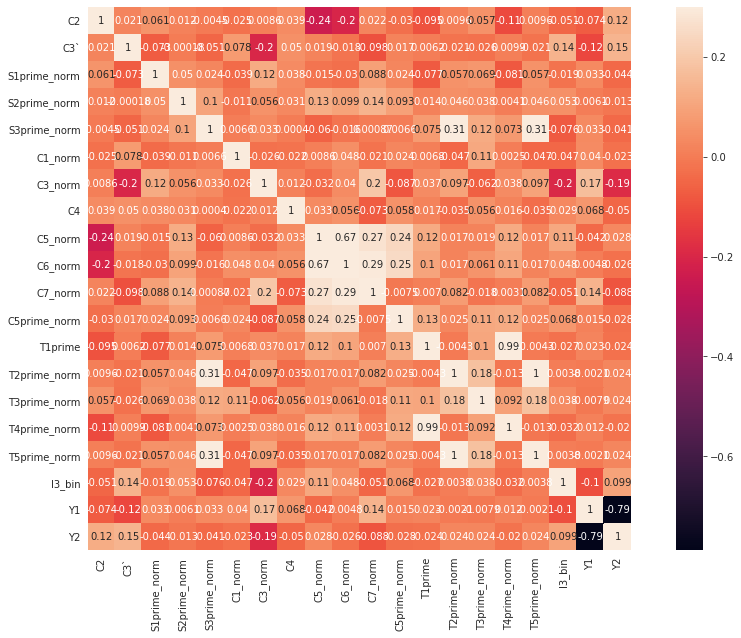

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = data4.corr()

mask = np.zeros_like(corrMatrix)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corrMatrix, mask=mask, vmax=.3, square=True,annot=True)

In [97]:
# feature selections 

In [98]:
data4.isnull().sum()

C2              0
C3`             0
S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
I3_bin          0
Y1              0
Y2              0
dtype: int64

In [99]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [100]:
# because we add 3 this will be different 
# X = array[:,0:17] #features
# Y1 = array[:,18] #target
# Y2 = array[:,19]
array = data4.values
X = array[:,0:17] #features
Y1 = array[:,18] #target
Y2 = array[:,19]

In [101]:
X.shape

(660, 17)

In [102]:
Y1.shape

(660,)

In [103]:
Y2.shape

(660,)

In [104]:
# test and add to see if performance is going up or down 

In [106]:
data4.to_csv('all.csv')

In [107]:
data4.columns

Index(['C2', 'C3`', 'S1prime_norm', 'S2prime_norm', 'S3prime_norm', 'C1_norm',
       'C3_norm', 'C4', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm',
       'T1prime', 'T2prime_norm', 'T3prime_norm', 'T4prime_norm',
       'T5prime_norm', 'I3_bin', 'Y1', 'Y2'],
      dtype='object')

In [108]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y1)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True False False False False False  True False False False  True False
  True False False  True False]
Feature Ranking: [ 1  3 13  9  8  5  1  4  2 11  1  6  1  7 12  1 10]


In [119]:
# select y1 features
y1_features = data4[['C2','C3_norm','C7_norm','T5prime_norm','T2prime_norm','Y1']]

y1_features.to_csv('y1_features.csv')

In [114]:
data4.columns

Index(['C2', 'C3`', 'S1prime_norm', 'S2prime_norm', 'S3prime_norm', 'C1_norm',
       'C3_norm', 'C4', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm',
       'T1prime', 'T2prime_norm', 'T3prime_norm', 'T4prime_norm',
       'T5prime_norm', 'I3_bin', 'Y1', 'Y2'],
      dtype='object')

In [110]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y2)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True  True False False False False  True False False False False False
  True False False  True False]
Feature Ranking: [ 1  1 11 13  7  9  1  4  2 12  3  5  1  8 10  1  6]


In [116]:
y2_features = data4[['C2','C3`','C3_norm','T2prime_norm','T5prime_norm','Y2']]
y2_features.to_csv('y2_features.csv')

# END

In [118]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

NameError: name 'SelectKBest' is not defined

In [ ]:
Y

In [ ]:
sklearn.feature_selection.f_classif(X, Y)

In [ ]:
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(Y,X_1).fit()
model.pvalues

In [ ]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,Y)  
#Fitting the data to model
model.fit(X_rfe,Y)
print(rfe.support_)
print(rfe.ranking_)